INTRODUCTION TO MACHINE LEARNING 
PRACTICAL TEST

Build a naive bayes classification model and show the model evaluation metrics

    Diabetes Dataset

In [2]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv('C:\\Users\\sravan\\Downloads\\diabete.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Steps:
#Data preprocessing - Missing value treatment if required, Outlier treatment if required
#Splitting the data into train and test
#Building the model - Algorithm required - NaivebayesClassifier


In [7]:
# Preprocessing

In [18]:
# checking for missing value
data.info()
data.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


9

No missing value observed

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


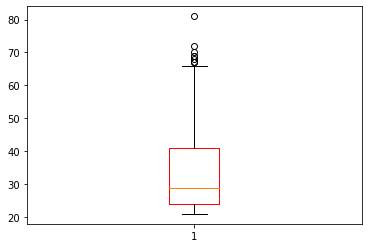

In [20]:
# Checking for Outlier and outlier treatment
#Univariate analysis
plt.boxplot(data['Age'], boxprops=dict(color='red'))
plt.show()


In [22]:
# Age varaible contains outliers
#The median age is around 28 and the data is more concentrated in between age group of 25 t0 30
# A larger spread in the data can be observed for any increase in age from 30



# Outlier treatment
 

        Any data point which is higher than the upper_limit and lower than the lower_limit is considered to an outlier
        # For outlier treatment , Capping Method is choosen - Wherein outlier is replaced with upper_limit for points above upper limit values and lower_limit for lower limit values

In [1]:
Q1=data.Age.quantile(0.25)
Q3=data.Age.quantile(0.75)
Q1,Q3

NameError: name 'data' is not defined

In [24]:
IQR=Q3-Q1
IQR
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit

(66.5, -1.5)

FUNCTION DEFENITION FOR OUTLIER TREATMENT

In [25]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value
    

In [26]:
data['Age']=data['Age'].apply(limit_imputer)

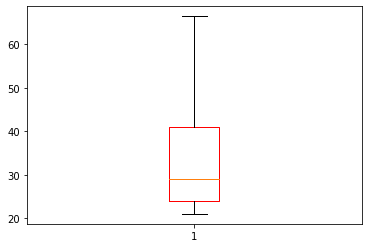

In [27]:
plt.boxplot(data['Age'], boxprops=dict(color='red'))
plt.show()

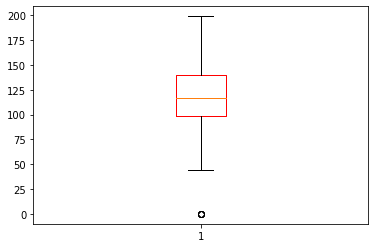

In [30]:
plt.boxplot(data['Glucose'], boxprops=dict(color='red'))
plt.show()

In [31]:
# Glucose : The data is concentrated more in the IQR range ie between 100 and 140 and among them the data is more cocentated in points between 100 and 120

In [32]:
#outlier treatment
Q1=data.Glucose.quantile(0.25)
Q3=data.Glucose.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit

(202.125, 37.125)

In [33]:
data['Glucose']=data['Glucose'].apply(limit_imputer)

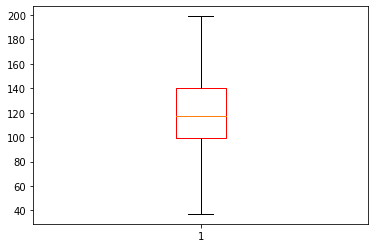

In [34]:
plt.boxplot(data['Glucose'], boxprops=dict(color='red'))
plt.show()

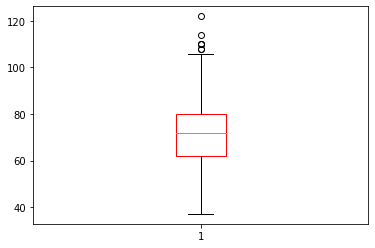

In [37]:
plt.boxplot(data['BloodPressure'], boxprops=dict(color='red'))
plt.show()


In [38]:
#BloodPressure: The median blood pressure level is approximately 75 for these data, with more data concentrated on levels between 75 and 80

In [39]:
#Outlier Treatment
Q1=data.BloodPressure.quantile(0.25)
Q3=data.BloodPressure.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit

(107.0, 35.0)

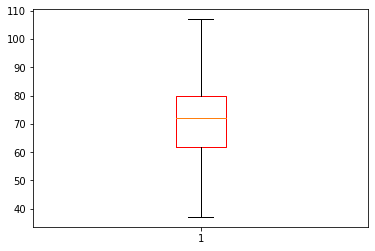

In [42]:
data['BloodPressure']=data['BloodPressure'].apply(limit_imputer)
plt.boxplot(data['BloodPressure'], boxprops=dict(color='red'))
plt.show()

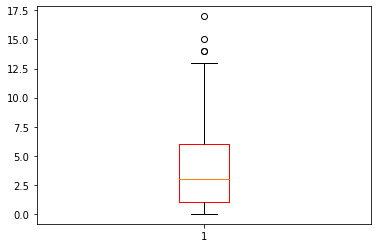

In [43]:
plt.boxplot(data['Pregnancies'], boxprops=dict(color='red'))
plt.show()

In [44]:
#  Pregnancies : The median no of pregnancies is between 1 and 3
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [46]:
#the most no of pregancies in these data is concentrated in the range of 0 to 3
# outlier treatment
Q1=data.Pregnancies.quantile(0.25)
Q3=data.Pregnancies.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit


(13.5, -6.5)

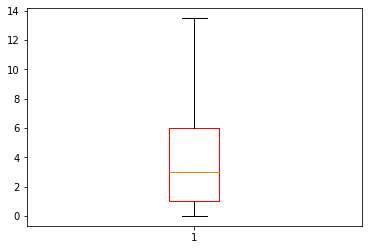

In [48]:
data['Pregnancies']=data['Pregnancies'].apply(limit_imputer)
plt.boxplot(data['Pregnancies'], boxprops=dict(color='red'))
plt.show()

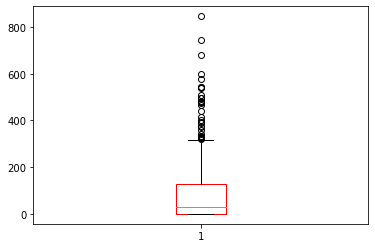

In [49]:
plt.boxplot(data['Insulin'], boxprops=dict(color='red'))
plt.show()

In [51]:
data['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [52]:
#Insulin : Most of the data is concentrated on insulin levels of 0 and 100
# Outlier Treatment
Q1=data.Insulin.quantile(0.25)
Q3=data.Insulin.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit


(318.125, -190.875)

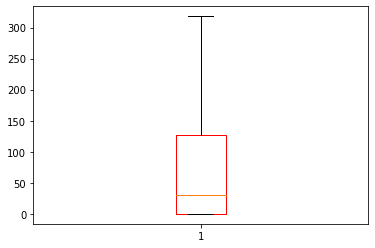

In [53]:
data['Insulin']=data['Insulin'].apply(limit_imputer)
plt.boxplot(data['Insulin'], boxprops=dict(color='red'))
plt.show()

#now most of the data is concentrated between 0 and 30 levels

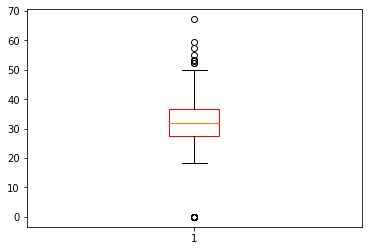

In [54]:
plt.boxplot(data['BMI'], boxprops=dict(color='red'))
plt.show()

In [56]:
# BMI : The medain BMI level in these data is in 30 levels and most of data falls in the IQR range
Q1=data.BMI.quantile(0.25)
Q3=data.BMI.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit

(50.550000000000004, 13.35)

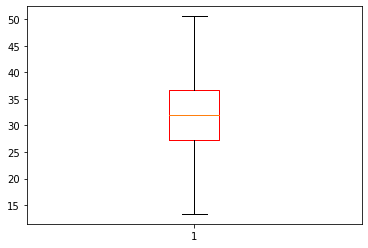

In [58]:
data['BMI']=data['BMI'].apply(limit_imputer)
plt.boxplot(data['BMI'], boxprops=dict(color='red'))
plt.show()

In [60]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.0,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,13.5,20.536458,73.652669,32.125065,0.471876,33.199870,0.348958
std,3.344157,31.187468,0.0,15.952218,93.576029,7.049584,0.331329,11.628404,0.476951
min,0.000000,37.125000,13.5,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,13.5,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,13.5,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,13.5,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,13.5,99.000000,318.125000,50.550000,2.420000,66.500000,1.000000


# Biverate Analysis

<AxesSubplot:>

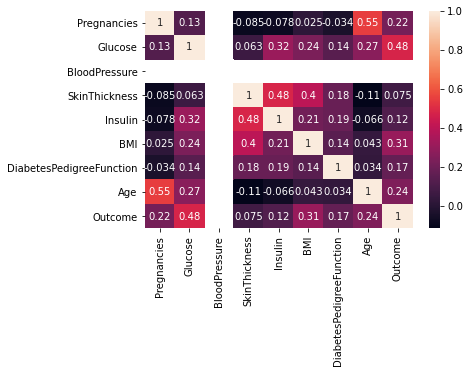

In [61]:
sns.heatmap(data.corr(), annot=True)

# Almost all independent variables are postively corellated to the dependent variable 
# Among them Glucose, Pregnancies,BMI are having moderate corellation to outcome while skinthickness and Insulin are having weak correlation
# Independent variables are having weak corellation between each other expect skinThickness to insulin

# MODEL BUILDING

In [63]:
X = data.drop(['Outcome'], axis=1)
y=data['Outcome']

# Seperating independent feature and Target variable , Variable X has all independent features and y holds Dependent features

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Splitting the data ; Parameter test_size splits the dataset into 80% Train data and 20% in to test data

In [65]:
len(X_train)

614

In [66]:
len(X_test)

154

In [67]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [71]:
#Fitting the data in to the model

In [72]:
model.fit(X_train,y_train)

GaussianNB()

In [73]:
#Testing the accuracy of the model;

In [75]:
#Model has got 79.27% accuracy ,based on 80%,20% split

In [78]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7987


In [80]:
#Y_Test is the class label and Y_Pred are the predicted class labels in the test set 
#the model has got 79.27% accuracy

In [83]:
#Compare the train-set and test-set accuracy
y_pred_train =model.predict(X_train)

y_pred_train

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [84]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7541


Check for overfitting and underfitting

In [85]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.7541
Test set score: 0.7987


In [86]:
# Accuracy score of both train and test is quite in the same range ,so there is no sigh of overfitting

# Confusion matrix

In [87]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[90 16]
 [15 33]]

True Positives(TP) =  90

True Negatives(TN) =  33

False Positives(FP) =  16

False Negatives(FN) =  15


The confusion matrix shows 90+33 = 123 correct predictions and 15 + 16 = 31 incorrect predictions


Classification metrices

 Classification_report : It displays the precision, recall, f1 and support scores for the model

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       106
           1       0.67      0.69      0.68        48

    accuracy                           0.80       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154




Classification accuracy




In [93]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [94]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7987


Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes

In [97]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8491


Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.Recall is also called Sensitivity.



In [98]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))



Recall or Sensitivity : 0.8571


True Positive Rate

In [99]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8571


False Positive Rate

In [101]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3265


Specificity

In [102]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6735


# Results and conclusion 

 The datasets were having  768 entries
 

 Gaussian Naive bayes classifier model is  used to predict whether a person is dainetic or not

 There were no NA in the dataset

For outlier treatment, Capping method of outlier treatment was used

The dataset was adequate for building the mode,as the independent varaibles was correlated to the predictor and the correlation between the independent variables was less

For model was built following a train to test ratio of 80:20

The training accuracy score is 79.27 while the test accuracy to be 75.63. These two values are quite comparable. So, there is no sign of overfitting.

The precision score was 84.91, Recall and sensitivity score was 85.71 ,True positivity score was 85.71
